# **Best Neighborhood in Pittsburgh**

## Introduction

The metric that we chose was the "best" neighborhood. We chose this because it would affect us all equally if we ever decided to live here past graduation. The metrics were "Crime-Rate", "Test-Scores", and "Occupation-Equality". Before I chose Occupation Equality, I had originally decided to look at distance from these neighborhoods from downtown Pittsburgh but found that the map I was planning to use would not work. I then decided that the equality between men and women working was important to me, which led to my decision for my current metric. Our final metric was decided by each metric having a top 20 and then cross referencing the neighborhood that lands the highest on each list. 

# The Metrics:

## Crime by Neighborhood (Ruchira Nimmagadda)
---

Crime, as in safety, is often a large factor affecting many other things in the ecosystem of a neighborhood. Crime rates give lots of insight into the overall quality of life in a neighborhood. To determine the *best* neighborhood in Pittsburgh, you must also determine the safest. Here, we have a data set detailing the incidents reported by the City of Pittsburgh Police during the past seven years. 

**Let's breakdown this data!**

Each entry in this data set is an incident. Let's see how many incidents have occured in each neighborhood and sort that list from least to greatest. 

In [1]:
import pandas as pd

# Original data from csv
raw_data = pd.read_csv("crime.csv",  index_col="_id")

# Removing all of the columns with unnecessary information
data = raw_data.drop(columns=['X', 'Y', 'INCIDENTTIME', 'PUBLIC_WORKS_DIVISION', 'HIERARCHY', 'COUNCIL_DISTRICT', 'INCIDENTTRACT', 'OFFENSES', 'INCIDENTZONE', 'INCIDENTLOCATION', 'CLEAREDFLAG', 'INCIDENTHIERARCHYDESC', 'CCR', 'PK'])
data.head(10)

# Getting the number of incident entries with each neighborhood, sorting that list from least to greatest
incident_count = data['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True)

#Changing the value to be incidents per year instead of incidents per seven years
per_year = incident_count/7 
per_year

Mt. Oliver Boro                14.000000
Mt. Oliver Neighborhood        16.714286
Outside County                 34.571429
Troy Hill-Herrs Island         36.000000
Ridgemont                      41.714286
                                ...     
Bloomfield                   1217.142857
Shadyside                    1219.571429
Carrick                      1662.428571
South Side Flats             2657.714286
Central Business District    2751.142857
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: float64

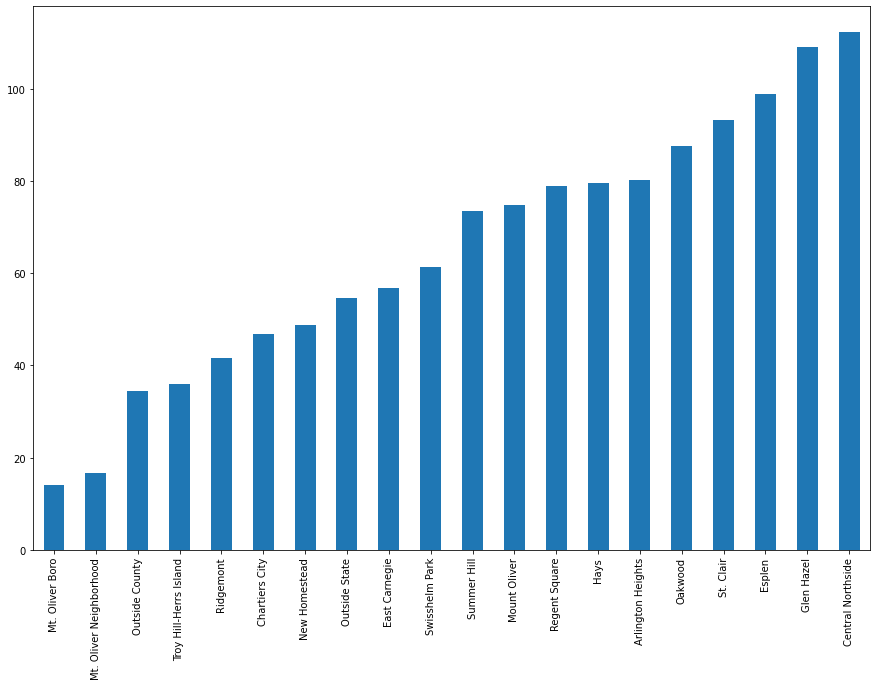

In [2]:
# Bar graph of the 20 neighborhoods with the lowest incidents per year 
incidents_graph = per_year.head(20).plot.bar(x='INCIDENTNEIGHBORHOOD', y=per_year, figsize=(15,10))

Pennsylvania has 2,559 towns/neighborhoods and on average 247,190 crimes per year in total, meaning that the average number of crimes per neighborhood would be:

In [3]:
247190/2559 

96.59632669011333

In [4]:
# List of the 20 neighborhoods with the lowest incidents per year 
per_year.head(20)

Mt. Oliver Boro             14.000000
Mt. Oliver Neighborhood     16.714286
Outside County              34.571429
Troy Hill-Herrs Island      36.000000
Ridgemont                   41.714286
Chartiers City              46.857143
New Homestead               48.857143
Outside State               54.571429
East Carnegie               56.857143
Swisshelm Park              61.285714
Summer Hill                 73.428571
Mount Oliver                74.857143
Regent Square               78.857143
Hays                        79.571429
Arlington Heights           80.142857
Oakwood                     87.571429
St. Clair                   93.142857
Esplen                      98.857143
Glen Hazel                 109.142857
Central Northside          112.285714
Name: INCIDENTNEIGHBORHOOD, dtype: float64

<br> Since we sorted this list in ascending order, its first 20 values will be the neighborhoods with the smallest amount of incidents per year. Most of these values are less than the state average of 97 crimes per year. 

In conclusion, we can determine that the Top 5 "safest" neighborhoods are Mt. Oliver Boro, Mt. Oliver Neighborhood, Outside County, Troy Hill-Herrs Island, and Ridgemont. Their incidents per year are the lowest out of all of the Pittsburgh neighborhoods in this data set, and are also the lowest compared to the Pennsylvania average crimes per year. 

## Education By Neighborhood (Anandhi Narayan)
---
Often times a neighborhood or area can be judged based upon the enrollement and performance of the students attending the local schools. The amount of individualized Learning Plans, or IEPs, often help show the accomodation level of a school - which often times acts as a reflection of the quality of the neighborhood where the students live. The more accommodating a school is, the better the neighborhood is. 

We will be using the IEP by Neighborhood 2020-21 school year reported by Pittsburgh Public Schools.

In [5]:
import pandas as pd

#The Original Data
original_data = pd.read_csv("neighborhood_iep.csv",index_col="neighborhoods")

#Totals: Enrolment AND IEPs
total_enrolment = original_data.drop(columns=['gifted','other_iep', 'not_iep_or_gifted'])
total_ieps = ((original_data['gifted'] + original_data['other_iep']))

#Calculating and Creating a Data Frame of percentage of the student body that has an IEP + Sorting it
percentage_df = total_ieps/total_enrolment['total_enrollment_k_12'] *100
sorted_percentages = percentage_df.sort_values(ascending=False)

#Print Data Frame
sorted_percentages.head(20)

neighborhoods
Point Breeze                                                               42.156863
Squirrel Hill South, Regent Square, Swisshelm Park                         41.411451
Squirrel Hill North                                                        39.024390
South Side Flats                                                           35.779817
Central, Upper Lawrenceville                                               34.468085
South Side Slopes                                                          34.463277
Hazelwood, Glen Hazel                                                      33.858268
West End, Elliott                                                          33.606557
Highland Park                                                              33.507853
Sheraden                                                                   32.704403
Point Breeze North                                                         32.558140
Chartiers City, Esplen, Fairywood, Windgap         

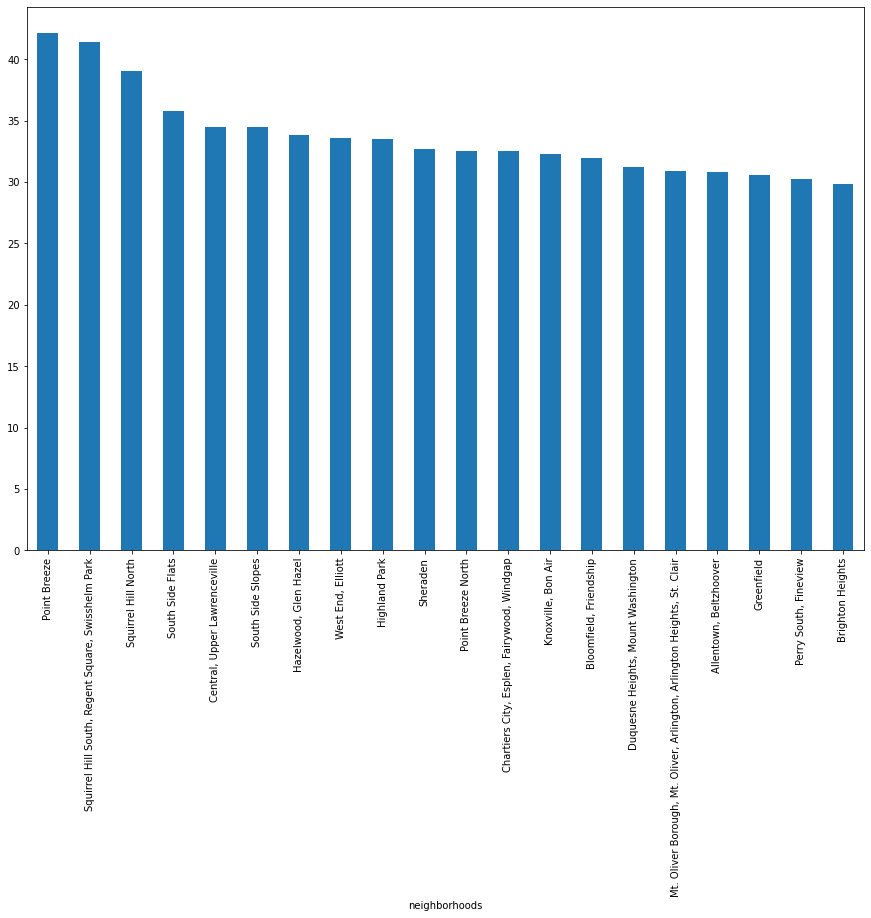

In [6]:
# Bar Graph of 20
percentage = sorted_percentages.head(20).plot.bar(x='neighborhoods', y=sorted_percentages, figsize=(15, 10))

Looking at all this data, we can come to the conclusion that the best Neighborhood in regards to Education/Educational Flexability is Point Breeze. 

## Gender Occupation by Neighborhood (Pearl Singer)
---

In [7]:
import pandas as pd
import geopandas

data = pd.read_csv("Gender_occupation.csv")

Let's get rid of all the data for a second and just focus on the first 30 neighborhoods that this data was collected from

# *The* Best Neighborhood

Out of the top twenty neighborhoods in each individual section we tested, there was only one commonality: **Regent Square**. This combination of low crime rate, well rounded educational opportunities for those students who require more and less from the curriculum offered, and a balanced workforce makes Regent Square the best neighborhood in Pittsburgh. 

# Conclusion:

**Ruchira Nimmagadda**: Our metrics for determining the "best" neighborhood were slightly biased to the "best" in terms of living there. When deciding my personal favorite neighborhood, I am not considered living there at all. Therefore, my personal factors for determining a neighborhood are vastly different to those that we chose as a group. Some factors I considered were quantity of good restaurants, available activities, and overall beauty. My personal favorite neighborhood, decided during my limited time in Pittsburgh, is Squirrel Hill. 

**Anandhi Narayan**: 

**Pearl Singer**: I chose Carrick, Pittsburgh Pennslyvania because my metric was based off of the most equal amount of both women and men who held jobs. Carrick was 49.8762% women which means it was 50.1238% men. This was the closest neighborhood to an even split of 50/50, men and women who are working and over the age of 16.